# Lab 7 Logistic Regression

***
- **FIRST name**: Muhammad Affan
- **LAST name**: Nazir
- **Student ID**: 1807593

Leave blank if individual:
- **Collaborator names**:
- **Collaborator student IDs**:
***

# Lab 7:

In today's lab, you will learn:

1.   Using sklearn's logistic regression model;
2.   Using sklearn's pipeline;
3.   Using sklearn's confusion matrix.

For this lab, you'll need the dataset `iris.csv`.

It is recommended to review [Notes on Classification](https://canvas.ualberta.ca/courses/5531/files/2030628?wrap=1) before proceeding with this lab.

In [76]:
#run this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pre-processing the Data

In lab 6, you learned about *linear regression* and how it's used to make predictions on data. You may have noticed that the data used for child height was continuous. For data where the outcomes are discrete, we use *logistic regression*.

**Question 1.1.** In the cell below, import the dataset `iris.csv` and assign it to `iris_df`. Print its first 5 values.

In [77]:
# YOUR CODE HERE
iris_df = pd.read_csv("iris.csv")
print(iris_df.shape)

(150, 6)


This dataset contains three iris species: setosa, versicolor, and virginica. It also contains the flower's petal length, petal width, sepal length, and sepal width. Our goal is to use logistic regression so that we can predict what species of iris we have given its measurements.

**Question 1.2.** Recall that we denote `X` as our features and `Y` as our target. Separate the dataset into its features and target.

In [78]:
# YOUR CODE HERE
X = iris_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
Y = iris_df["Species"]

Luckily, we don't have to make our own logistic regression model from scratch. We can import a library called `sklearn` that has the functions we need to make predictions on our iris data. However, for the functions to work, our target data must be numerical. To convert categorical data to numerical, we encode the target labels with values between 0 and n-1, where n is the number of classes. For our iris data, we will use sklearn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

**Question 1.3.** First import sklearn's LabelEncoder, then convert the targets from categorical to numerical. Assign your answer to `Y`. Consult the link above for help.

In [79]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Y.unique())
Y = le.transform(Y)

# 2. Pipeline

Before we learn what the Pipeline does, we have to split our X and Y datasets in two:
1. Training set: this subset is used to train the model. It usually makes up 80% of the data;
2. Testing set: this subset is used to test the model to see how it performs. It usually makes up 20% of the data.

This is done for the features and the targets separately. It's important that the test data is not used to train the model because it could lead to memorizing the data.

**Question 2.1.** First import sklearn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), then split the data into `X_train`, `X_test`. `Y_train`, and `Y_test` respectively. The parameter `test_size` sets the proportion of data for the testing subset (set to 0.2). The `random_state` parameter controls how much the data is shuffled before being split.

In [80]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

The purpose of using the [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) function is to chain multiple steps into a single object. For this lab, we're going to go through two steps in our pipeline:
1. **Standard Scalar**: this standardizes the features by removing the mean and scaling to a standard deviation of one;
2. **Logistic Regression**: this fits a logistic regression model to the data.

**Question 2.2.** Import the appropriate functions for the pipeline, logistic regression, and standard scalar. Next, use the pipeline function to assemble the steps 'scalar' and 'classifier'. For the function `LogisticRegression`, set the parameter `max_iter` to 200. Assign your answer to `pipeline`.

In [113]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
                ("scalar",StandardScaler()), #Scalar = name of the step. Could name anything.
                ("classifier", LogisticRegression(max_iter = 200)) # max_iter = max epochs
                ])

**Question 2.3.** Now, use the `.fit` method to fit the training data to our pipeline. The output will be a diagram that shows each step our pipeline takes to transform and fit the data to the logistic regression model. Click on the steps to expand them.

In [82]:
# YOUR CODE HERE
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=200))])

# 3. Predicting and Assessing

Now that we have our pipeline, we can start making predictions on our iris data.

**Question 3.1.** Use the `.predict` method to make predictions and assign your answer to `Y_pred`. Make sure you use the right feature subset (training vs. testing)!

In [83]:
# YOUR CODE HERE

Y_pred = pipeline.predict(X_test)
print(X_test)
print("\nY_pred: ", Y_pred)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
88             5.6           3.0            4.1           1.3
72             6.3           2.5            4.9           1.5
20             5.4           3.4            1.7           0.2
16             5.4           3.9            1.3           0.4
147            6.5           3.0            5.2           2.0
140            6.7           3.1            5.6           2.4
113            5.7           2.5            5.0           2.0
23             5.1           3.3            1.7           0.5
12             4.8           3.0            1.4           0.1
68             6.2           2.2            4.5           1.5
39             5.1           3.4            1.5           0.2
130            7.4           2.8            6.1           1.9
34             4.9           3.1            1.5           0.1
112            6.8           3.0            5.5           2.1
55             5.7           2.8            4.5           1.3
25      

We print the X_test subset and Y_pred to better understand what's going on. X_test contains 30 random flowers and their metrics. Y_pred is an array of 30 predictions where 0 denotes setosa, 1 denotes versicolor, and 2 denotes verginica.

Now let's assess the performance of our predictor. The first tool that we can use is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to get the true positive, true negative, false positive, and false negative of our predictor.

**Question 3.2.** Import the confusion matrix function from `sklearn` and test the predictions made above. Assign your answer to `conf_matrix`.

In [84]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


Now, run the cell below to better visualize the confusion matrix:

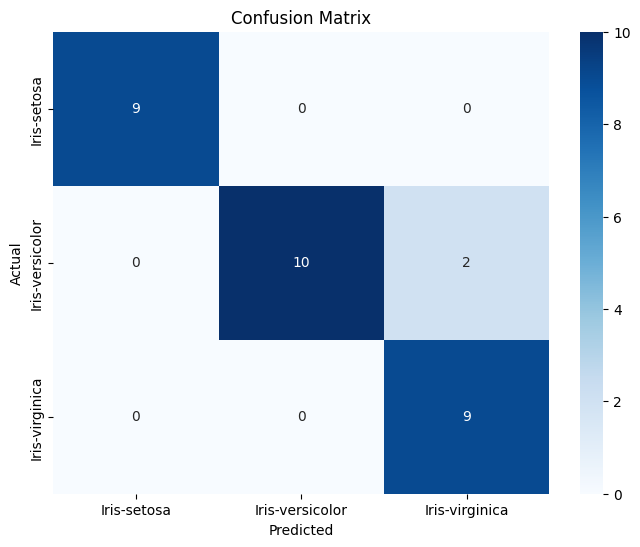

In [94]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Question 3.3.** What is the TP, TN, FP, and FN of your predictor? What does this mean in terms of its performance?

We can see from the confusion matrix, that the predictor accurately predicted All 9 iris-setosa and All 9 iris-virginica. If we compare it to iris-versicolor, 10 were accurately predicted and 2 were miss-classified into iris-virginica.
Iris Setosa:
TP = 9;
TN = 10 + 9 + 2 = 21;
FP = 0;
FN = 0;
,
Iris Versicolor:
TP = 10;
TN = 9 + 9 = 18;
FP = 0;
FN = 0 (The '2' classified as Iris-Verginca);
,
Iris Virginica:
TP = 9;
TN = 19;
FP = 2 (2 Iris-versicolor classified as iris-verginca );
FN = 0;


`sklearn` provides a function called [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which calculates the precision, recall, F1-score, and support of a predictor. The support is how many samples there are in each class.

**Question 3.4.** Import the classification report from `sklearn` and use it to assess the performance of your predictions. Assign your answer to `class_report`.

In [114]:
# YOUR CODE HERE
from sklearn.metrics import classification_report

class_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91        12
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30



**Question 3.5.** What is the precision, recall, and F1-score of each iris species? What does this tell us about the performance of the predictor?

The precision is [1, 1, 0.82], the recall is [1, 0.83, 1] and the f1-score is [1,0.91,0.9] for ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] respectively.
As we can see: precision, recall and f1-score are all high; ∈ [0.82,1]. This indicates that the model is performing really well. The model is desirable, and can be used in practical life.

# Rubric

| Question | Points|
|----------|----------|
| 1.1.    | 5   |
| 1.2.    | 10   |
| 1.3.    | 10   |
| 2.1.    | 15   |
| 2.2.    | 20   |
| 2.3.    | 5   |
| 3.1.    | 5   |
| 3.2.    | 10   |
| 3.3.    | 5   |
| 3.4.    | 10   |
| 3.5.    | 5   |
| Total:    | 100   |